In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [393]:
def load_data() :
    print("Loading Data...")
    df = pd.read_csv('./diamonds.csv')

    # categorical_columns = ['cut', 'color', 'clarity']
    # df = pd.get_dummies(df, columns=categorical_columns, drop_first=True, dtype=int)
    
    df = pd.get_dummies(df, drop_first=True, dtype=int)
    print(df.columns)
    

    # Extract X and y
    y = df['price'].to_numpy()
    
    x = df.drop(columns=['S.No', 'price']).to_numpy()

    print("Loading Complete....")
    return x, y

x, y = load_data()


Loading Data...
Index(['S.No', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')
Loading Complete....


In [394]:
def normalize(x, y):
    x_scaled = np.zeros_like(x, dtype=float)

    features = x.shape[1]
    epsilon = 1e-8
    try:
        for i in range (features):
            x_mean = np.mean(x[:, i])
            x_std = np.std(x[:, i])

            x_scaled[:, i] = (x[:, i] - x_mean) / (x_std + epsilon)
    except :
        print("Error")



    y_mean = np.mean(y)
    y_std = np.std(y)

    y = (y - y_mean) / y_std

    # Add the bias column (ones) back after scaling
    x_scaled = np.hstack([np.ones((x.shape[0], 1)), x_scaled])
    print(x_scaled)


    
    print("Feature scaling done.")
    return x_scaled, y, y_mean, y_std

x, y, y_mean, y_std = normalize(x, y)


[[ 1.         -1.19816778 -0.17409151 ... -0.5422949  -0.26960283
  -0.32195386]
 [ 1.         -1.24036126 -1.36073848 ... -0.5422949  -0.26960283
  -0.32195386]
 [ 1.         -1.19816778 -3.3850186  ... -0.5422949  -0.26960283
  -0.32195386]
 ...
 [ 1.         -0.20662095  0.73334441 ... -0.5422949  -0.26960283
  -0.32195386]
 [ 1.          0.13092691 -0.52310532 ... -0.5422949  -0.26960283
  -0.32195386]
 [ 1.         -0.10113724  0.31452783 ... -0.5422949  -0.26960283
  -0.32195386]]
Feature scaling done.


In [395]:
from sklearn.preprocessing import PolynomialFeatures

def polynomial_features(X, degree):
    poly = PolynomialFeatures(degree, include_bias=False)
    

    x_poly = poly.fit_transform(X)

    print(f"Before : {x.shape}")
    print(f"After : {x_poly.shape}")

    return x_poly

    # samples, features = X.shape
    # poly_features = [np.ones((samples, 1))]

    # # print(poly_features)

    # for power in range(1, degree + 1):
    #     poly_features.append(X ** power)

    # print(np.hstack(poly_features))
    # return np.hstack(poly_features)

x = polynomial_features(x, 2)

Before : (53940, 24)
After : (53940, 324)


In [396]:
def split_data(x, y):
    tot_rows = x.shape[0]
    indices = np.random.choice(tot_rows, size=int(0.8 * tot_rows), replace=False)

    x_train = x[indices]
    y_train = y[indices]

    x_test = np.delete(x, indices, axis=0)
    y_test = np.delete(y, indices, axis=0)

    print('Data split for training and testing')

    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = split_data(x, y)


Data split for training and testing


In [397]:
def compute_error(pred_y, y_train):
    error_vector = np.subtract(pred_y, y_train)
    error_vector = np.square(error_vector)

    mean_error = np.mean(error_vector)
    return mean_error

In [398]:
def model(W, X):
    pred_y = np.dot(X, W)
    
    return pred_y

In [399]:
no_of_features = x.shape[1]
W = np.random.rand(no_of_features) * 0.01
epochs = 600
learning_rate = 0.0009
lambda_parameter = 0.001

beta1 = 0.9
beta2 = 0.98
epsilon = 1e-8

print('Variables initialised')
print("Random Weights :")
print(W)

print(x.shape)

Variables initialised
Random Weights :
[8.10813721e-03 1.11268858e-03 6.91275716e-03 1.78169544e-03
 2.59645499e-03 1.19161335e-03 5.22646959e-03 3.30620156e-03
 8.00279950e-03 3.27623779e-03 3.89570477e-03 6.73252616e-03
 9.78594759e-03 1.52345393e-04 8.20260169e-03 8.19492360e-03
 5.39876157e-03 9.90813076e-03 1.40176821e-03 8.29243278e-03
 8.26056020e-03 8.30559585e-03 8.06242372e-03 5.58959429e-03
 5.82194001e-03 5.74589222e-04 4.24322212e-03 7.84795497e-03
 1.09795616e-03 1.43670125e-03 2.87391642e-03 9.73408385e-03
 7.24815590e-03 3.26799904e-03 4.41131532e-03 2.51928410e-03
 4.18356520e-03 4.00917693e-03 1.36197899e-03 8.37685571e-04
 3.40456886e-04 9.88134872e-03 1.84425658e-03 1.70643374e-03
 9.04853708e-03 4.08520796e-03 1.93183247e-03 5.60834305e-03
 9.58944297e-03 9.28191372e-03 5.51728546e-03 7.63301307e-03
 8.81108507e-03 2.33748057e-03 9.57584145e-04 4.63879261e-04
 1.82343241e-03 4.19815723e-03 4.43976308e-03 8.74804817e-03
 9.73550733e-03 9.63155863e-03 4.13450760e-03 

In [400]:
def adam_optimiser(W, x_train, y_train, epochs, beta1, beta2, epsilon, learning_rate, lambda_parameter):
    print("Running ADAM : ")


    m = np.zeros_like(W)
    v = np.zeros_like(W)

    error_over_time = []

    for i in range (1, epochs + 1):
        pred_y = model(W, x_train)

        mean_error = compute_error(pred_y, y_train)
        error_over_time.append(mean_error)

        gradient = (2 / x_train.shape[0]) * np.dot(x_train.T, (pred_y - y_train)) + (2 * lambda_parameter * W)

        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)

        m_hat = m / (1 - beta1 ** i)
        v_hat = v / (1 - beta2 ** i)

        W = W - learning_rate * (m_hat / (np.sqrt(v_hat) + epsilon))

        if (i % 50 == 0 or i == 1 or i == epochs):
            print(f'epoch : {i}')

    return W, error_over_time

W, error_over_time = adam_optimiser(W, x_train, y_train, epochs, beta1, beta2, epsilon, learning_rate, lambda_parameter)

Running ADAM : 
epoch : 1
epoch : 50
epoch : 100
epoch : 150
epoch : 200
epoch : 250
epoch : 300
epoch : 350
epoch : 400
epoch : 450
epoch : 500
epoch : 550
epoch : 600


In [401]:
def gradient_descent(W, x_train, y_train, epochs, learning_rate):
    print("Running gradient descent : ")
    error_over_time = []

    for i in range (epochs):
        pred_y = model(W, x_train)

        mean_error = compute_error(pred_y, y_train)
        error_over_time.append(mean_error)

        gradient = (2 / x_train.shape[0]) * np.dot(x_train.T, (pred_y - y_train))

        # print(gradient.shape)
        # print(gradient)

        W = W - learning_rate * gradient

        if (i % 100 == 0 or i == epochs - 1):
            print(f'epoch : {i}')

    return W, error_over_time

# W, error_over_time = gradient_descent(W, x_train, y_train, epochs, learning_rate)
    

Plotting Error :


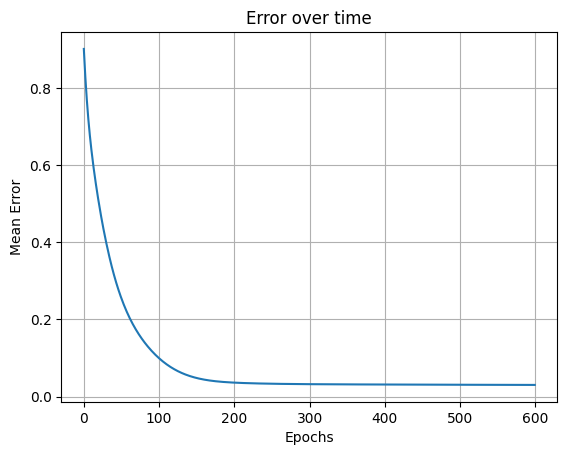

In [402]:
def plot_error():
    print("Plotting Error :")
    x_axis = np.arange(epochs)
    y_axis = error_over_time

    plt.plot(x_axis, y_axis)
    plt.xlabel("Epochs")
    plt.ylabel("Mean Error")
    plt.title("Error over time")
    plt.grid(True)
    
    plt.show()


plot_error()

In [403]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def test_accuracy(W, x_test, y_test):
    pred_y = model(W, x_test)

    pred_y_norm = model(W, x_test)
    
    # Denormalize predictions
    pred_y = pred_y_norm * y_std + y_mean
    y_test = y_test * y_std + y_mean

    mse = mean_squared_error(y_test, pred_y)
    mae = mean_absolute_error(y_test, pred_y)
    r2 = r2_score(y_test, pred_y)

    print(f"Mean Squared Error : {mse}")
    print(f"Mean Absolute Error : {mae}")
    print(f"R2 Score : {r2}")
    
test_accuracy(W, x_test, y_test)

Mean Squared Error : 510923.25108463597
Mean Absolute Error : 421.32078440162206
R2 Score : 0.9687309038319147


In [404]:
import pickle

def save_data():
    model_data = {
        'weights': W,
    }

    with open('diamond_prediction.pkl', 'wb') as f:
        pickle.dump(model_data, f)
    
    print("Model saved successfully.")

save_data()

Model saved successfully.
